# Chapter 09 独立同一分布 second

ランダム標本と同じことかな

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%precision 3
%matplotlib inline

In [2]:
linestyles = ['-', '--', ':', '-.']

# 前回までの

def E(XY, g):
    # x_set, y_set = f_XY, XY
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i - mean_X) * (y_j - mean_Y) * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

## 9.1　|　独立性

### 9.1.1　独立性の定義

$2 次元確率変数 (X, Y) の場合 \\
f_{X, Y} (x, y) = f_{X}(x) f_{Y}(y) \\
が成り立つとき, X と Y は独立であるという.$

### 9.1.2　独立性と無相関性

独立  ならば  無相関  
逆は言えない

In [3]:
# イカサマサイコロの例

x_set = np.array([1, 2, 3, 4, 5, 6])
y_set = np.array([1, 2, 3, 4, 5, 6])

def f_XY(x, y):
    if x in x_set and y in y_set:
        return x * y / 441
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [4]:
Cov(XY)

-8.326672684688674e-17

In [5]:
x_set = np.array([0, 1])
y_set = np.array([-1, 0, 1])

def f_XY(x, y):
        if (x, y) in [(0, 0), (1, 1), (1, -1)]:
            return 1/3
        else:
            return 0
        
XY = [x_set, y_set, f_XY]

In [6]:
Cov(XY)

0.0

In [7]:
f_X(0) * f_Y(0), f_XY(0, 0)

(0.1111111111111111, 0.333)

## 9.2　|　和の分布

### 9.2.1　正規分布の和の分布

In [9]:
rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(2.998791486185034, 4.989310383954272)

### 9.2.2　ポアソン分布の和の分布

In [10]:
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(6.997701, 6.996421714599001)

### 9.2.3　ベルヌーイ分布の和の分布

In [11]:
p = 0.3
rv = stats.bernoulli(p)

sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
sum_sample = np.sum(Xs_sample, axis=0)

np.mean(sum_sample), np.var(sum_sample)

(2.999051, 2.0967000993990004)

## 9.3　|　標本平均の分布

### 9.3.1　正規分布の標本平均の分布

In [12]:
mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(0.9993838216457928, 0.19993786330572352)

### 9.3.2　ポアソン分布の標本平均の分布

In [13]:
l = 3
rv = stats.poisson(l)

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(2.9991311999999994, 0.3000221851865601)

### 9.3.3　中心極限定理

In [14]:
l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

In [15]:
np.mean(sample_mean), np.var(sample_mean)

(3.00003121, 0.0002955656049359)

### 9.3.4　大数の法則

In [16]:
p = 1/6
rv = stats.bernoulli(p)

n = int(1e5)
sample = rv.rvs((n, 4))
space = np.linspace(100, n, 50).astype(int)
plot_list = np.array([np.mean(sample[:sp], axis=0) for sp in space]).T

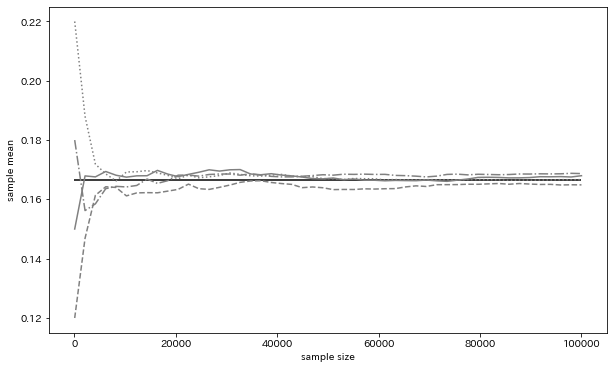

In [17]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for pl, ls, in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='gray')
    
ax.hlines(p, -1, n, 'k')
ax.set_xlabel('sample size')
ax.set_ylabel('sample mean')

plt.show()